#Tarefa 60 - OpenCV

Fai un programa en Python que coa imaxe escaneada:

- Identifica os cuadrilateros da imaxe.

- Conta o número de "circulos" e encerraos dentro dun cuadrilatero

In [14]:
import numpy as np
import cv2 as cv

cargador = cv.imread("Escaneo-cargador.jpg")
type(cargador)

numpy.ndarray

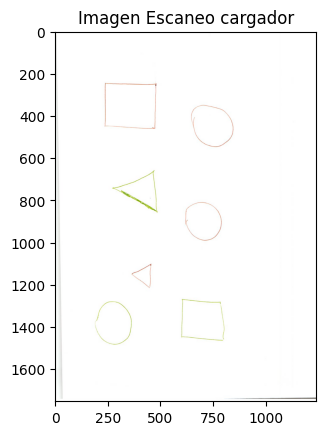

In [15]:
from matplotlib import pyplot as plt

plt.imshow(cargador)
plt.title('Imagen Escaneo cargador')
plt.show()

In [16]:
cargador.shape

(1753, 1240, 3)

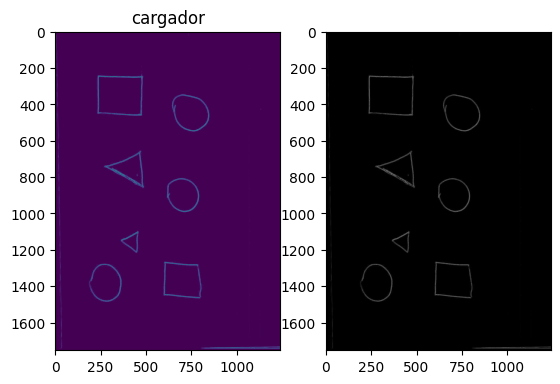

In [29]:
plt.subplot(1, 2, 1)
plt.imshow(cargador)
plt.title('cargador')
plt.subplot(1, 2, 2)
plt.imshow(cargador,cmap='gray', vmin=0, vmax=255)
plt.show()

Text(0.5, 1.0, 'Engadindo borde anacos')

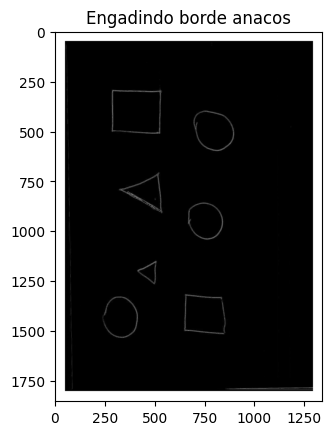

In [30]:
constant= cv.copyMakeBorder(cargador,50,50,50,50,cv.BORDER_CONSTANT,value=255)

plt.imshow(constant,cmap='gray', vmin=0, vmax=255)
plt.title('Engadindo borde anacos')

In [31]:
cv.imwrite("cargador/conbordes.png",constant)

False

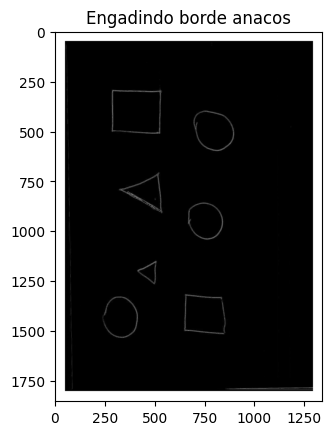

False

In [32]:
import cv2
import matplotlib.pyplot as plt

# Assuming "cargador" is your image data or array
# Example: cargador = your_image_data_or_array

# Add a constant border to the image
constant = cv2.copyMakeBorder(cargador, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=255)

# Display the image with Matplotlib
plt.imshow(constant, cmap='gray', vmin=0, vmax=255)
plt.title('Engadindo borde anacos')
plt.show()

# Save the image to a file named "conbordes.png" inside the "cargador" directory
cv2.imwrite("cargador/conbordes.png", constant)


# CREAMOS BORDES Y GUARDAMOS como conbordes.png

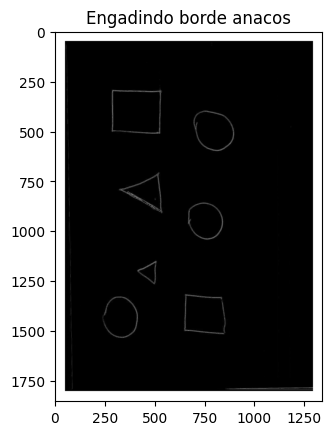

True

In [33]:
import cv2
import os
import matplotlib.pyplot as plt

# Assuming "cargador" is your image data or array
# Example: cargador = your_image_data_or_array

# Add a constant border to the image
constant = cv2.copyMakeBorder(cargador, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=255)

# Display the image with Matplotlib
plt.imshow(constant, cmap='gray', vmin=0, vmax=255)
plt.title('Engadindo borde anacos')
plt.show()

# Specify the directory path
directory = "/media/DIURNO/CURSO/PIA_ISAAC/Ud2 Python/TarefazPIA/Tarefa60OpenCV/cargadores"

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Save the image to a file named "conbordes.png" inside the "cargadores" directory
cv2.imwrite(os.path.join(directory, "conbordes.png"), constant)


# intentando buscar coordenadas

In [35]:
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv.getPerspectiveTransform(rect, dst)
	warped = cv.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped    

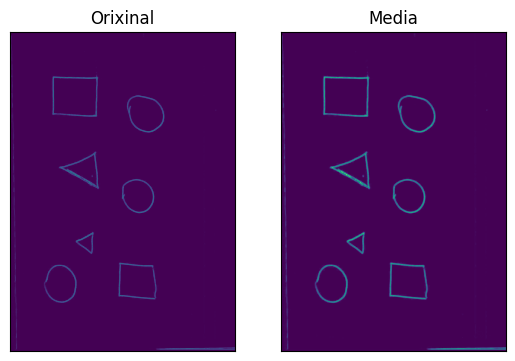

In [36]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(cargador,-1,kernel)
plt.subplot(121),plt.imshow(cargador),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Media')
plt.xticks([]), plt.yticks([])
plt.show()

buscar  bordes

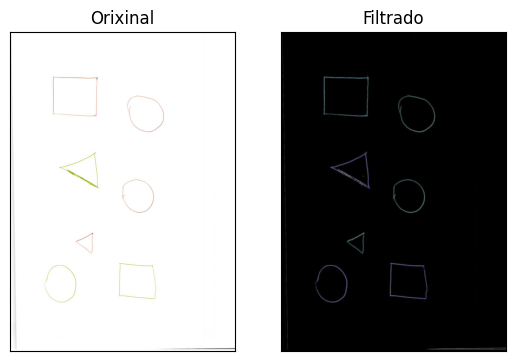

True

In [24]:
kernel2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
dst = cv.filter2D(cargador,-1,kernel2)
plt.subplot(121),plt.imshow(cargador),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Filtrado')
plt.xticks([]), plt.yticks([])
plt.show()

# Guardar la imagen filtrada como "reversecolours.png"
cv2.imwrite("reversecolours.png", dst)

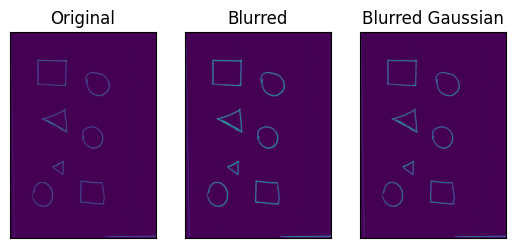

True

In [38]:
blur = cv.blur(cargador,(5,5))
blurG = cv.GaussianBlur(cargador,(5,5),0)
plt.subplot(131),plt.imshow(cargador),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blurG),plt.title('Blurred Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite("originalblurredblurredgaussian.png", dst)

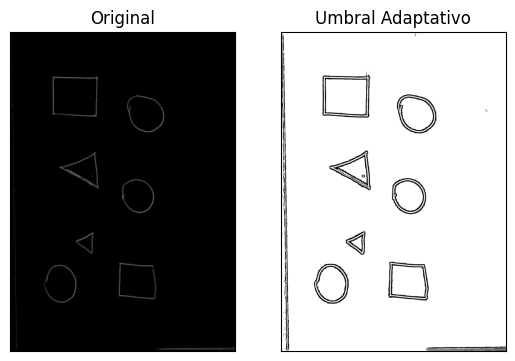

True

In [37]:
import cv2
import matplotlib.pyplot as plt

# Especifica la ruta correcta de tu imagen en blanco y negro
ruta_imagen = "/media/DIURNO/CURSO/PIA_ISAAC/Ud2 Python/TarefazPIA/Tarefa60OpenCV/reversecolours.png"

# Carga la imagen en escala de grises
cargador = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Aplicar un desenfoque gaussiano a la imagen en escala de grises
blur = cv2.GaussianBlur(cargador, (5, 5), 0)

# Umbral adaptativo usando el método de umbral adaptativo medio
th2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Mostrar las imágenes original y umbral adaptativo
plt.subplot(121), plt.imshow(cargador, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(th2, cmap='gray'), plt.title('Umbral Adaptativo')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("UmbralAdaptativo.png", dst)